Create ombrothermic diagram for Paracou (Guyaflux)

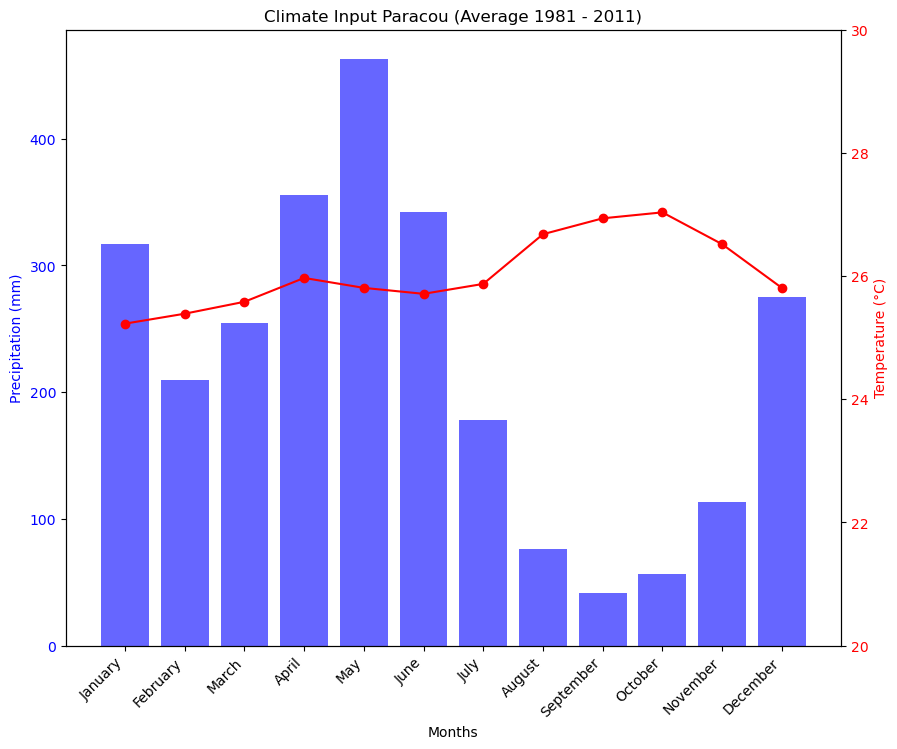

In [77]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
import calendar

# Set path to output files
path = '//clusterfs/biodiversity/annavo/climate_input/'

# File library for climate input guyaflux (Paracou)
guyaflux_climate_input = {'pr_1901-2013_Guyaflux.nc': 'pr', 'tmp_1901-2014_Guyaflux.nc': 'temp'}

# Create figure and subplots
fig, ax1 = plt.subplots(figsize=(10, 8))

pr_monthly_sums = []
temp_monthly_means = []

# Loop through output files
for i, file in enumerate(guyaflux_climate_input):
    ds = xr.open_dataset(os.path.join(path, file), drop_variables=['longitude', 'latitude'])
    # Percipitation
    if i == 0:
        pr_variable = 'pr'
        ds_variable = ds[pr_variable]
        ds_variable = ds_variable.sel(latitude=0, longitude=0, time=slice('1981-01-01', '2011-12-31'))
        pr_monthly_sum = ds_variable.resample(time='M').sum(dim='time')
        pr_monthly_sums.append(pr_monthly_sum)
    #Temperature
    elif i == 1:
        temp_variable = 'temp'
        ds_variable = ds[temp_variable]
        ds_variable = ds_variable.sel(latitude=0, longitude=0, time=slice('1981-01-01', '2011-12-31'))
        temp_monthly_mean = ds_variable.resample(time='M').mean(dim='time')
        temp_monthly_means.append(temp_monthly_mean)

# Combine monthly sums along the time dimension
pr_combined_monthly_sums = xr.concat(pr_monthly_sums, dim='time')
pr_monthly_averages = pr_combined_monthly_sums.groupby('time.month').mean(dim='time')

# Combine monthly means along the time dimension
temp_combined_monthly_means = xr.concat(temp_monthly_means, dim='time')
temp_monthly_averages = temp_combined_monthly_means.groupby('time.month').mean(dim='time')

# Plot the resulting average values
month_names = [calendar.month_name[i] for i in range(1, 13)]
pr_monthly_averages_series = pr_monthly_averages.to_pandas()
temp_monthly_averages_series = temp_monthly_averages.to_pandas()

# Plot precipitation data as a bar chart
pr_bars = ax1.bar(range(12), pr_monthly_averages_series, color='blue', alpha=0.6)#, label='Precipitation')
ax1.set_xlabel('Months')
ax1.set_ylabel('Precipitation (mm)', color='blue')
ax1.set_xticks(range(12))
ax1.set_xticklabels(month_names, rotation = 45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Climate Input Paracou (Average 1981 - 2011)')

# Create a twin y-axis for temperature
ax2 = ax1.twinx()
temp_line = ax2.plot(range(12), temp_monthly_averages_series, marker='o', color='red')#, label='Temperature')
ax2.set_ylabel('Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(20, 30)  # Set lower limit to 20 degrees

# Combine the bar chart and line plot for the ombrothermic diagram
lines = tuple(pr_bars) + tuple(temp_line)

# Show the plot
plt.show()




Create ombrothermic diagram for Tapajos (Santarem)

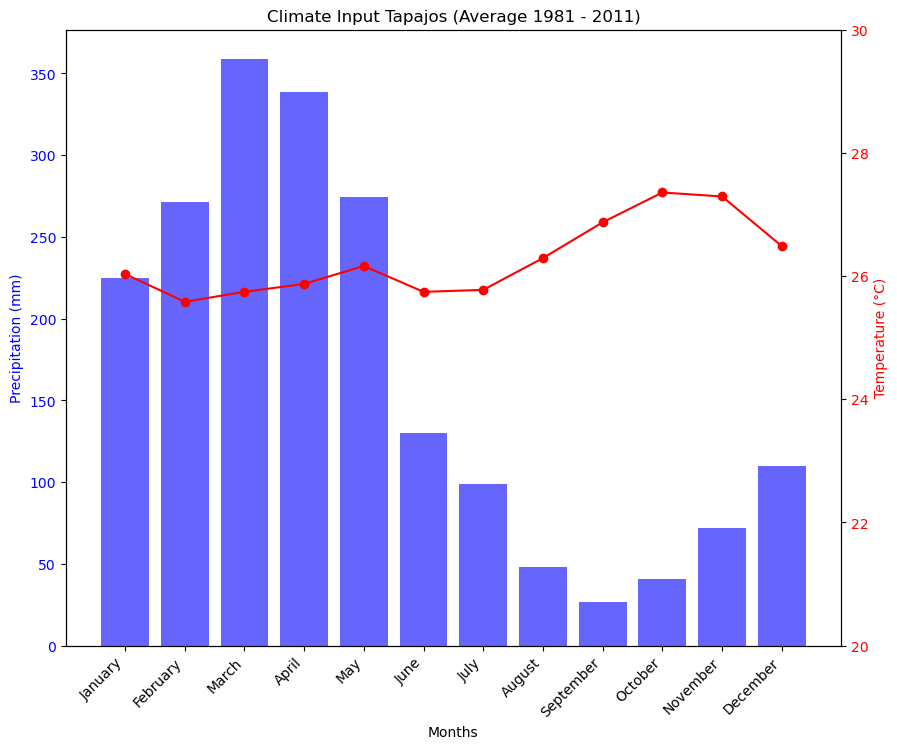

In [78]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
import calendar

# Set path to output files
path = '//clusterfs/biodiversity/annavo/climate_input/'

# File library for climate input guyaflux (Paracou)
santarem_climate_input = {'pr_1901-2013_santarem.nc': 'prec', 'tmp_1901-2014_santarem.nc': 'tmp'}

# Create figure and subplots
fig, ax1 = plt.subplots(figsize=(10, 8))

pr_monthly_sums = []
temp_monthly_means = []

# Loop through output files
for i, file in enumerate(santarem_climate_input):
    ds = xr.open_dataset(os.path.join(path, file), drop_variables=['longitude', 'latitude'])
    # Percipitation
    if i == 0:
        pr_variable = 'prec'
        ds_variable = ds[pr_variable]
        ds_variable = ds_variable.sel(lat='-2.75', lon='-54.75', time=slice('1981-01-01', '2011-12-31'))
        pr_monthly_sum = ds_variable.resample(time='M').sum(dim='time')
        pr_monthly_sums.append(pr_monthly_sum)
    #Temperature
    elif i == 1:
        temp_variable = 'tmp'
        ds_variable = ds[temp_variable]
        ds_variable = ds_variable.sel(lat='-2.75', lon='-54.75', time=slice('1981-01-01', '2011-12-31'))
        temp_monthly_mean = ds_variable.resample(time='M').mean(dim='time')
        temp_monthly_means.append(temp_monthly_mean)

# Combine monthly sums along the time dimension
pr_combined_monthly_sums = xr.concat(pr_monthly_sums, dim='time')
pr_monthly_averages = pr_combined_monthly_sums.groupby('time.month').mean(dim='time')

# Combine monthly means along the time dimension
temp_combined_monthly_means = xr.concat(temp_monthly_means, dim='time')
temp_monthly_averages = temp_combined_monthly_means.groupby('time.month').mean(dim='time')

# Plot the resulting average values
month_names = [calendar.month_name[i] for i in range(1, 13)]
pr_monthly_averages_series = pr_monthly_averages.to_pandas()
temp_monthly_averages_series = temp_monthly_averages.to_pandas()

# Plot precipitation data as a bar chart
pr_bars = ax1.bar(range(12), pr_monthly_averages_series, color='blue', alpha=0.6)#, label='Precipitation')
ax1.set_xlabel('Months')
ax1.set_ylabel('Precipitation (mm)', color='blue')
ax1.set_xticks(range(12))
ax1.set_xticklabels(month_names, rotation = 45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Climate Input Tapajos (Average 1981 - 2011)')

# Create a twin y-axis for temperature
ax2 = ax1.twinx()
temp_line = ax2.plot(range(12), temp_monthly_averages_series, marker='o', color='red')#, label='Temperature')
ax2.set_ylabel('Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(20, 30)  # Set lower limit to 20 degrees

# Combine the bar chart and line plot for the ombrothermic diagram
lines = tuple(pr_bars) + tuple(temp_line)

# Show the plot
plt.show()




Read and plot daily climate input Paracou & Tapajos

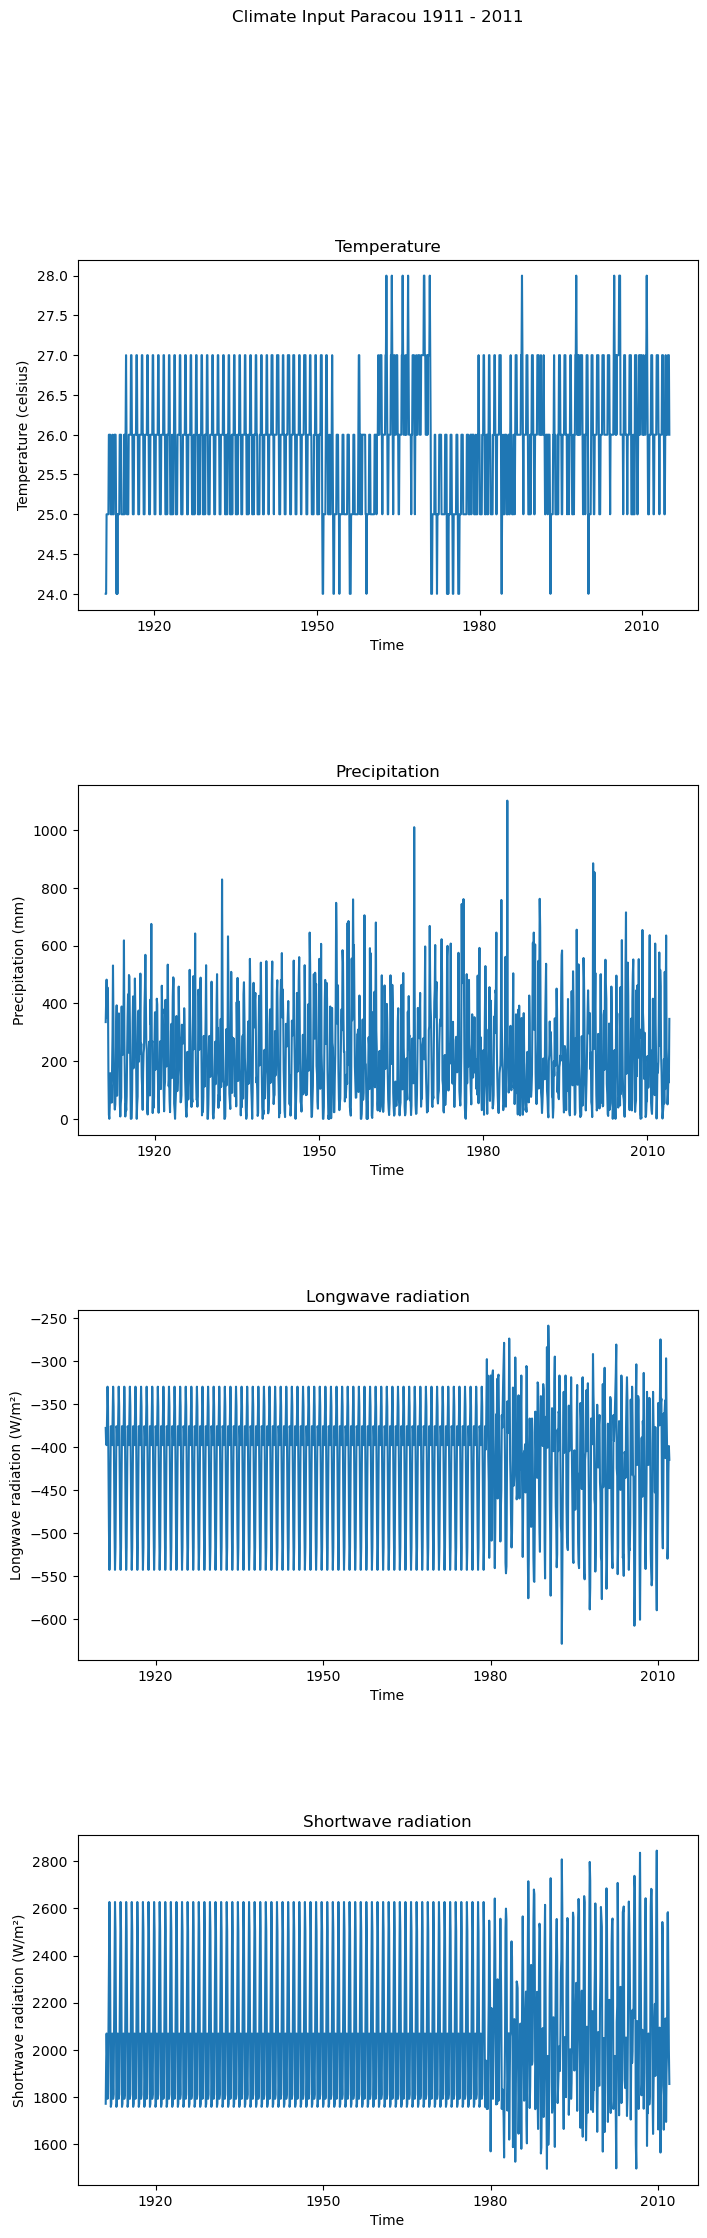

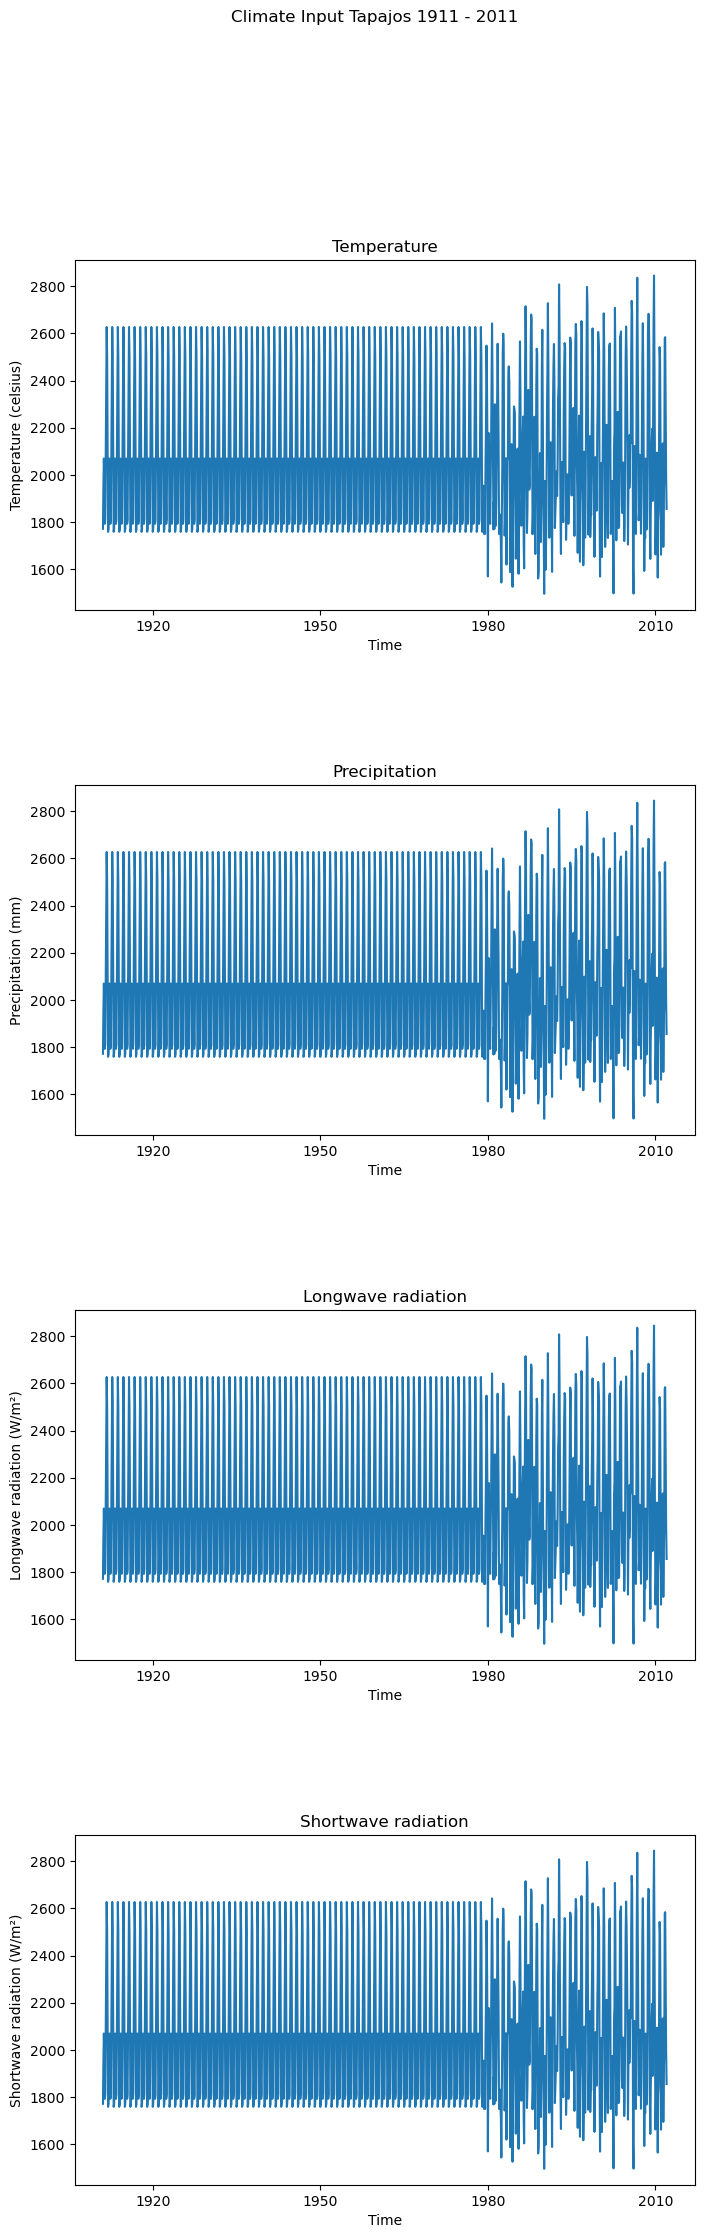

In [38]:
# import necessary packages

import xarray as xr
import matplotlib.pyplot as plt
import os
import numpy as np
import rasterio
import pandas as pd
import nc_time_axis

# set path to output files 
path = '//clusterfs/biodiversity/annavo/climate_input/'

# file libraries for logging output
guyaflux_climate_input = {'tmp_1901-2014_Guyaflux.nc': 'temp', 'pr_1901-2013_Guyaflux.nc': 'pr','lwnet_1901-2011_Guyaflux.nc': 'lwnet',  'swdown_1901-2011_Guyaflux.nc': 'swdown' }
guyaflux_climate_input_units = {'tmp_1901-2014_Guyaflux.nc': 'Temperature (celsius)', 'pr_1901-2013_Guyaflux.nc': 'Precipitation (mm)', 'lwnet_1901-2011_Guyaflux.nc': 'Longwave radiation (W/m²)', 'swdown_1901-2011_Guyaflux.nc': 'Shortwave radiation (W/m²)'}

santarem_climate_input = {'tmp_1901-2014_santarem.nc': 'tmp',  'pr_1901-2013_santarem.nc': 'prec', 'lwnet_1901-2011_santarem.nc': 'lwnet','swdown_1901-2011_santarem.nc': 'swdown', 'tmp_1901-2014_santarem.nc': 'tmp'}
santarem_climate_input_units = {'tmp_1901-2014_santarem.nc': 'Temperature (celsius)', 'pr_1901-2013_santarem.nc': 'Precipitation (mm)','lwnet_1901-2011_santarem.nc':'Longwave radiation (W/m²)',  'swdown_1901-2011_santarem.nc': 'Shortwave radiation (W/m²)'}

guyaflux_title ={'tmp_1901-2014_Guyaflux.nc': 'Temperature', 'pr_1901-2013_Guyaflux.nc': 'Precipitation', 'lwnet_1901-2011_Guyaflux.nc': 'Longwave radiation', 'swdown_1901-2011_Guyaflux.nc': 'Shortwave radiation'}
santarem_title = {'tmp_1901-2014_santarem.nc': 'Temperature', 'pr_1901-2013_santarem.nc': 'Precipitation','lwnet_1901-2011_santarem.nc':'Longwave radiation',  'swdown_1901-2011_santarem.nc': 'Shortwave radiation'}


# PLOT PARACOU (GUYAFLUX)
# Create figure and subplots
fig, axs = plt.subplots(len(guyaflux_climate_input), 1, figsize=(8, 25))

# Loop through output files
for i, file in enumerate(guyaflux_climate_input):
    # Loop through runs and plot data
    
    ds = xr.open_dataset(os.path.join(path, file))
       
    variable = guyaflux_climate_input[file]
    unit = guyaflux_climate_input_units[file]
    title = guyaflux_title[file]
    ds_variable = ds[variable] 
    # Filter data after 1911
    ds_variable = ds_variable.sel(time=slice('1911-01-01', None))
    # Calculate the yearly mean
    yearly_mean = ds_variable.resample(time='M').mean(dim='time') 

    # Plot the yearly mean
    yearly_mean.plot(ax=axs[i])

    # Set title and legend for subplot
    axs[i].set_title(title)
    # axs[i].legend('Paracou')

    # Set axis labels for subplot
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel(unit)
    

# Set overall title for figure
fig.suptitle('Climate Input Paracou 1911 - 2011')

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.5)
plt.show()


# PLOT TAPAJOS (SANTAREM)
# Create figure and subplots
fig, axs = plt.subplots(len(santarem_climate_input), 1, figsize=(8, 25))

# Loop through output files
for i, file in enumerate(santarem_climate_input):
    # Loop through runs and plot data
    
    ds = xr.open_dataset(os.path.join(path, file))
       
    variable = santarem_climate_input[file]
    unit = santarem_climate_input_units[file]
    title = santarem_title[file]
    ds_variable = ds[variable] 

    # Plot the yearly mean
    yearly_mean.plot(ax=axs[i])

    # Set title and legend for subplot
    axs[i].set_title(title)
    # axs[i].legend('Paracou')

    # Set axis labels for subplot
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel(unit)
    

# Set overall title for figure
fig.suptitle('Climate Input Tapajos 1911 - 2011')

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.5)
plt.show()


